# Visualisation

The data analysis process often requires visualising the data. The Python ecosystem offers several possibilities for data visualisation, such as [matplotlib](https://matplotlib.org), [bokeh](http://bokeh.pydata.org/en/latest/), [seaborn](https://seaborn.pydata.org), [altair](https://altair-viz.github.io), etc.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./data/european_union.csv', sep=';', index_col=1)
df.head(3)

,country,capital,accession_date,population,euro_zone_member,immigration,emigration,contribution_to_eu_budget_millions_euro,expenditure_eu_budget_millions_euro
country_code,,,,,,,,,
AT,Austria,Vienna,1995-01-01,8822267,True,111801,66144,1869,1743
BE,Belgium,Brussels,1957-03-25,11398589,True,126703,89690,2172,7358
BG,Bulgaria,Sofia,2007-01-01,7050034,False,25597,31586,276,1896


## matplotlib

**pandas** is well integrated with matplotlib, so we can quickly produce graphics for exploration purposes:

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

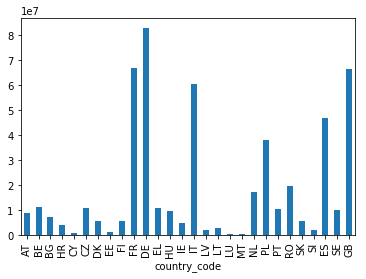

In [77]:
# The simplest possible way of plotting the contents of the 'population' column
df['population'].plot.bar()

The graphic above is neither pretty, nor very useful. Let's improve it a bit:

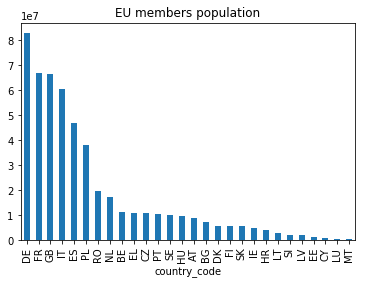

In [78]:
# Sort the values and add a title
df['population'].sort_values(ascending=False).plot.bar(title="EU members population")

## bokeh

In [79]:
import bokeh
import bokeh.plotting
bokeh.plotting.output_notebook()

Loading BokehJS ...

Select the data we want to plot from the dataframe:

In [80]:
# Select the population, in millions, per country
population = (df['population'] / 1_000_000).sort_values(ascending=False)
population.head(3)

country_code
DE    82.792351
FR    66.926166
GB    66.273576
Name: population, dtype: float64

In [81]:
fig1 = bokeh.plotting.figure(
    title = 'EU members population',
    x_axis_label = 'country code',
    y_axis_label = 'millions',
    x_range = population.index.values,
)
fig1.vbar(x=population.index.values, top=population.get_values(), width=0.8)
bokeh.plotting.show(fig1)

Improve the visual attributes of the figure:

In [82]:
fig2 = bokeh.plotting.figure(
    title = 'EU members population',
    x_axis_label = 'country code',
    y_axis_label = 'millions',
    x_range = population.index.values,
    plot_width = 800,
    plot_height = 600,
    background_fill_color = 'whitesmoke',
    background_fill_alpha = 0.8,
)
fig2.xgrid.grid_line_color = None
fig2.toolbar.autohide = True
fig2.vbar(x=population.index.values, top=population.get_values(), width=0.8, alpha=0.6)
bokeh.plotting.show(fig2)

Now add some interactivity to the figure:

In [83]:
data = bokeh.models.ColumnDataSource({
    'country_code': population.index.values,
    'country_name': df.loc[population.index.values, 'country'].values,
    'country_population': population.get_values(),
})

fig3 = bokeh.plotting.figure(
    title = 'EU members population',
    x_axis_label = 'country code',
    y_axis_label = 'millions',
    x_range = population.index.values,
    plot_width = 800,
    plot_height = 600,
    background_fill_color = 'whitesmoke',
    background_fill_alpha = 0.8
)
fig3.xgrid.grid_line_color = None
fig3.toolbar.autohide = True
fig3.add_tools(bokeh.models.HoverTool(
    tooltips = [
        ('country', '@country_name'),
        ('population', '@country_population{0.1f}m'),
    ],
    mode = 'mouse',
))
fig3.vbar(x='country_code', top='country_population', source=data, width=0.8, alpha=0.6, color='LightSeaGreen')

bokeh.plotting.show(fig3)

Another figure with additional customization: use the tooltips to present information not shown grapically

In [88]:
# Net number of individuals who immigrated to each country
net_immigration = (df['immigration'] - df['emigration']).sort_values(ascending=False)
net_immigration.head(3)

country_code
DE    356409
GB    284544
IT    188330
dtype: int64

In [89]:
data = bokeh.models.ColumnDataSource({
    'country_code': net_immigration.index.values,
    'net_immigration': net_immigration.get_values(),
    'pct_population': (net_immigration / df.loc[net_immigration.index.values, 'population']).get_values(),
    'country_name': df.loc[net_immigration.index.values, 'country'].values,
    'color': ['LightSeaGreen' if c else 'FireBrick' for c in (net_immigration > 0).get_values()],
})

fig4 = bokeh.plotting.figure(
    title = 'Net immigration to EU member countries (2017)',
    x_axis_label = 'country code',
    y_axis_label = 'individuals',
    x_range = net_immigration.index.values,
    plot_width = 800,
    plot_height = 600,
    background_fill_color = 'whitesmoke',
    background_fill_alpha = 0.8
)
fig4.xgrid.grid_line_color = None
fig4.toolbar.autohide = True
fig4.add_tools(bokeh.models.HoverTool(
    tooltips = [
        ('country', '@country_name'),
        ('net immigrants', '@net_immigration{0,0}'),
        ('percentage of population', '@pct_population{0.00%}'),
    ],
    mode = 'mouse',
))
fig4.yaxis.formatter = bokeh.models.formatters.NumeralTickFormatter(format="0,0")
fig4.vbar(x='country_code', top='net_immigration', source=data, width=0.8, alpha=0.6, color='color')

bokeh.plotting.show(fig4)